# Regression model to predict second hand car price

### Importing libraries

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

#overwriting sns
sns.set()

### Loading the dataset

In [3]:
#input dataset
dataset = pd.read_csv('1.04. Real-life example.csv')
dataset.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [4]:
#droping NaN and null values from the dataset
dataset = dataset.dropna(axis=0)

In [5]:
#summary and stats of the dataset
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


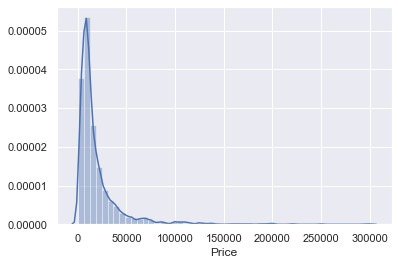

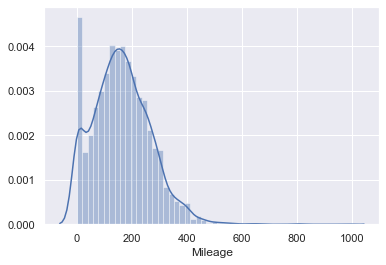

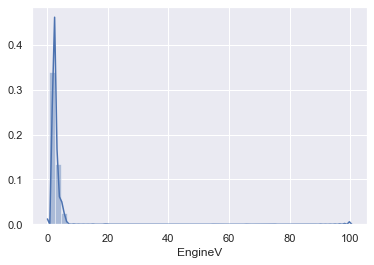

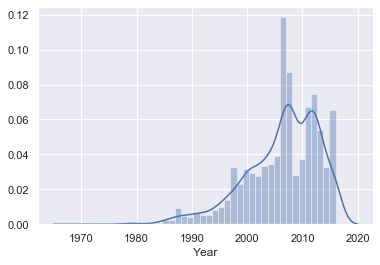

In [6]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
# We can remove the data which is variable and will be a disadvantage to our regression model
sns.distplot(dataset['Price'])
plt.show()
sns.distplot(dataset['Mileage'])
plt.show()
sns.distplot(dataset['EngineV'])
plt.show()
sns.distplot(dataset['Year'])
plt.show()

In [7]:
#summary and stats of the dataset
dataset.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
# In this way we have essentially removed the top 1% of the data about 'Price'

# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider


q = dataset['Price'].quantile(0.99)
dataset_1 = dataset[dataset['Price']<q]

q1 = dataset_1['Mileage'].quantile(0.99)
dataset_2 = dataset_1[dataset_1['Mileage']<q1]

dataset_3 = dataset_2[dataset_2['EngineV']<6.5]

q2 = dataset_3['Year'].quantile(0.01)
dataset_4 = dataset_3[dataset['Year']>q2]

dataset_4.describe(include='all')

C:\Users\DEEP\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


C:\Users\DEEP\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


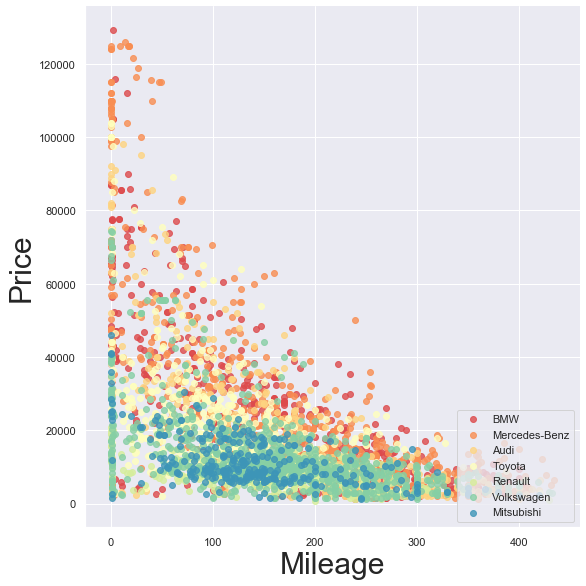

In [9]:
# scatterplot with categorical variable

sns.lmplot( x="Mileage", y="Price", data=dataset_4, fit_reg=False, hue='Brand',palette="Spectral", 
           legend=False, size = 8, height = 5) 
plt.xlabel('Mileage', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()

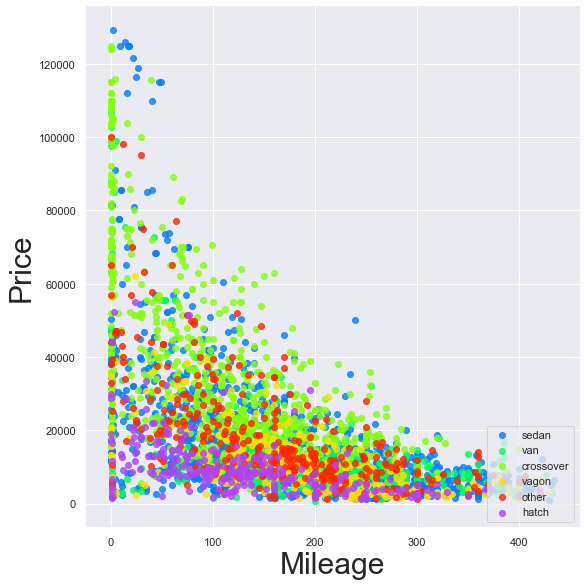

In [10]:
# scatterplot with categorical variable

sns.lmplot( x="Mileage", y="Price", data=dataset_4, fit_reg=False, hue='Body',palette="gist_ncar", 
           legend=False, size = 8, height = 5) 
plt.xlabel('Mileage', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()

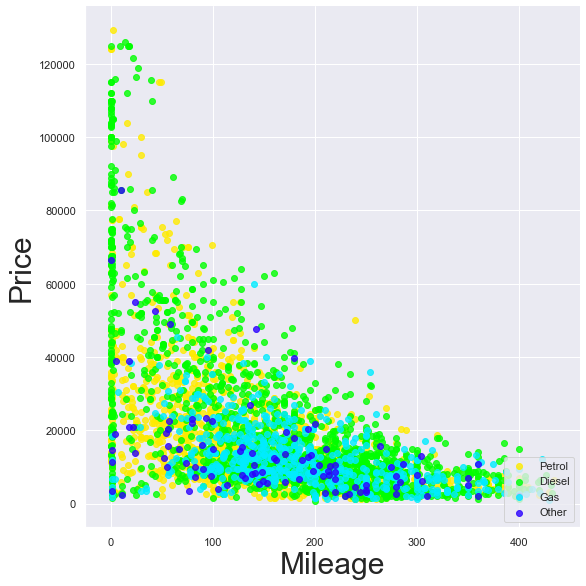

In [11]:
sns.lmplot( x="Mileage", y="Price", data=dataset_4, fit_reg=False, hue='Engine Type',palette="gist_rainbow", 
           legend=False, size = 8, height = 5) 
plt.xlabel('Mileage', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()

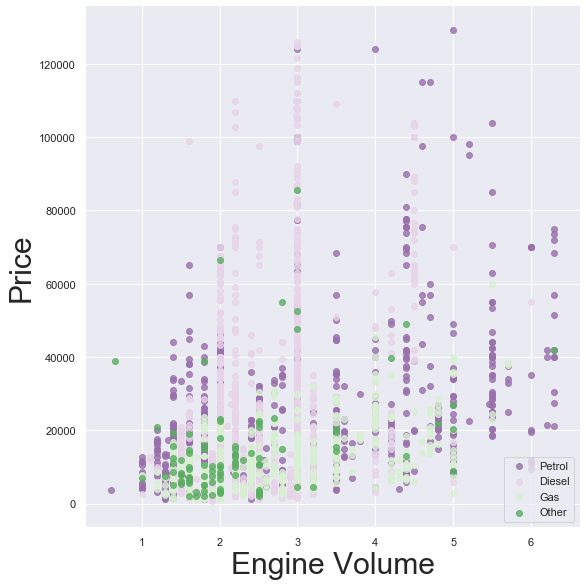

In [12]:
sns.lmplot( x="EngineV", y="Price", data=dataset_4, fit_reg=False, hue='Engine Type',palette="PRGn", 
           legend=False, size = 8, height = 5) 
plt.xlabel('Engine Volume', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()

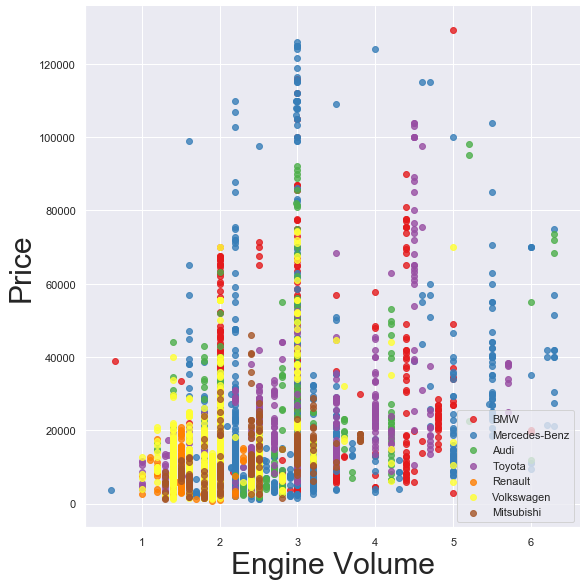

In [13]:
sns.lmplot( x="EngineV", y="Price", data=dataset_4, fit_reg=False, hue='Brand',palette="Set1", 
           legend=False, size = 8, height = 5) 
plt.xlabel('Engine Volume', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()

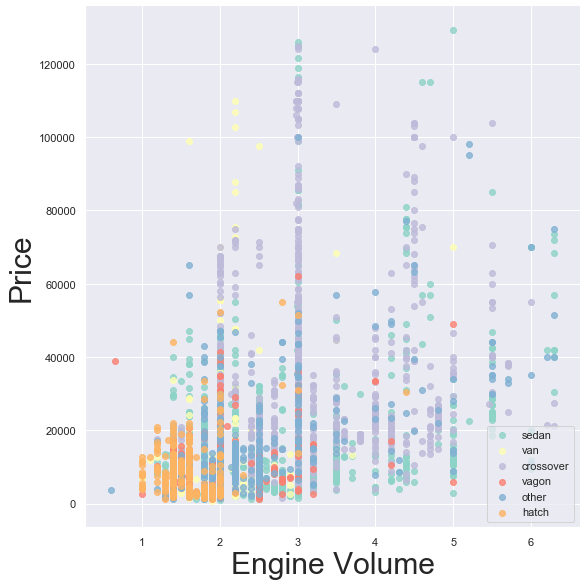

In [14]:
sns.lmplot( x="EngineV", y="Price", data=dataset_4, fit_reg=False, hue='Body',palette="Set3", 
           legend=False, size = 8, height = 5) 
plt.xlabel('Engine Volume', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.legend(loc='lower right') 
plt.show()

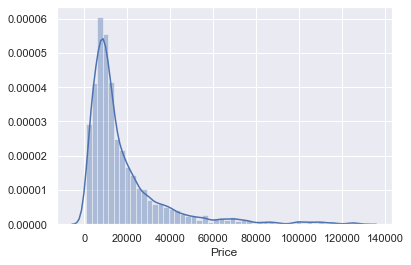

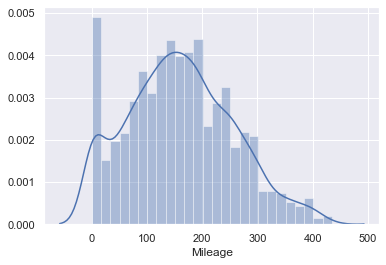

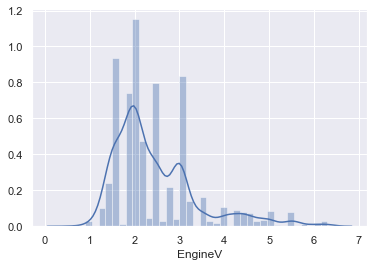

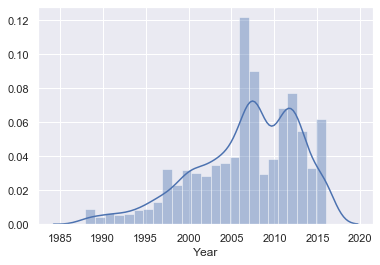

In [15]:
# Change in probability density function
sns.distplot(dataset_4['Price'])
plt.show()
sns.distplot(dataset_4['Mileage'])
plt.show()
sns.distplot(dataset_4['EngineV'])
plt.show()
sns.distplot(dataset_4['Year'])
plt.show()

In [16]:
# From the scatter plots it could be summarized that data behaves as exponential function
# Therefore, taking log based transformation will be benificial
# Let's transform 'Price' with a log transformation
log_price = np.log(dataset_4['Price'])

# Then we add it to our data frame
dataset_4['log_price'] = log_price
dataset_4

C:\Users\DEEP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


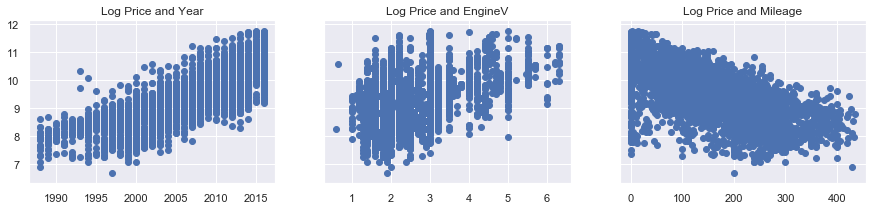

In [17]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(dataset_4['Year'],dataset_4['log_price'],cmap='Spectral')
ax1.set_title('Log Price and Year')
ax2.scatter(dataset_4['EngineV'],dataset_4['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(dataset_4['Mileage'],dataset_4['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [18]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = dataset_4[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [34]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
dataset_5 = dataset_4.drop(['Year'],axis=1)
dataset_6 = dataset_5.drop(['Registration'],axis=1)
dataset_7 = dataset_6.drop(['Model'],axis=1)
dataset_7

,Brand,Price,Body,Mileage,EngineV,Engine Type,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,9.814656
...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,9.350102
4339,Toyota,17900.0,sedan,35,1.6,Petrol,9.792556
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,11.736069
4341,BMW,6500.0,sedan,1,3.5,Petrol,8.779557


In [35]:
#frequency count
count_1 = dataset_7['Brand'].value_counts()
print(count_1)
#frequency count
count_2 = dataset_7['Body'].value_counts()
print(count_2)
#frequency count
count_3 = dataset_7['Engine Type'].value_counts()
print(count_3)

Volkswagen       848
Mercedes-Benz    755
BMW              624
Toyota           498
Renault          432
Audi             408
Mitsubishi       302
Name: Brand, dtype: int64
sedan        1467
crossover     795
van           610
vagon         372
other         370
hatch         253
Name: Body, dtype: int64
Diesel    1807
Petrol    1393
Gas        568
Other       99
Name: Engine Type, dtype: int64


### MANUAL REGRESSION

In [36]:
# regression manual 

# mapping categories with 01234...
data_copy = dataset_7.copy()
data_copy['Brand'] = dataset_7['Brand'].map({'Volkswagen':6,'Mercedes-Benz':5,'BMW':4,'Toyota':3,'Renault':2,'Audi':1,'Mitsubishi':0})
data_copy['Body'] = dataset_7['Body'].map({'hatch':5,'other':4,'vagon':3,'van':2,'crossover':1,'sedan':0})
data_copy['Engine Type'] = dataset_7['Engine Type'].map({'Diesel':3,'Petrol':2,'Gas':1,'Other':0})

data_copy.describe()

,Brand,Price,Body,Mileage,EngineV,Engine Type,log_price
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,3.652702,18194.455679,1.519524,160.542539,2.450440,2.269201,9.415703
std,1.930678,19085.855165,1.600187,95.633291,0.949366,0.802667,0.876616
min,0.000000,800.000000,0.000000,0.000000,0.600000,0.000000,6.684612
25%,2.000000,7200.000000,0.000000,91.000000,1.800000,2.000000,8.881836
50%,4.000000,11700.000000,1.000000,157.000000,2.200000,2.000000,9.367344
75%,5.000000,21700.000000,3.000000,225.000000,3.000000,3.000000,9.985068
max,6.000000,129222.000000,5.000000,435.000000,6.300000,3.000000,11.769287


In [22]:
#test regression 

yt = data_copy['log_price']
xt = data_copy[['EngineV','Mileage','Brand']]

# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(xt)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(yt,x).fit()
# Print a nice summary of the regression.
results.summary()

C:\Users\DEEP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1650.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:22:30   Log-Likelihood:                -3382.9
No. Observations:                3867   AIC:                             6774.
Df Residuals:                    3863   BIC:                             6799.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2265      0.034    270.355      0.000       9.160       9.293
EngineV        0.3811      0.010     38.733      0.000       0.362       0.400
Mileage       -0.0057   9.79e-05    -58.493      0.000      -0.006      -0.006
Brand          0.0478      0.005      9.854      0.000       0.038       0.057
==============================================================================
Omnibus:                      449.614   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.338
Skew:                          -0.787   Prob(JB):                    9.68e-170
Kurtosis:                       4.534   Cond. No.                         699.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[ 0.38112962 -0.00572673  0.047805  ]
9.226534695391049
Regression score of this model is: 56.16068356346125


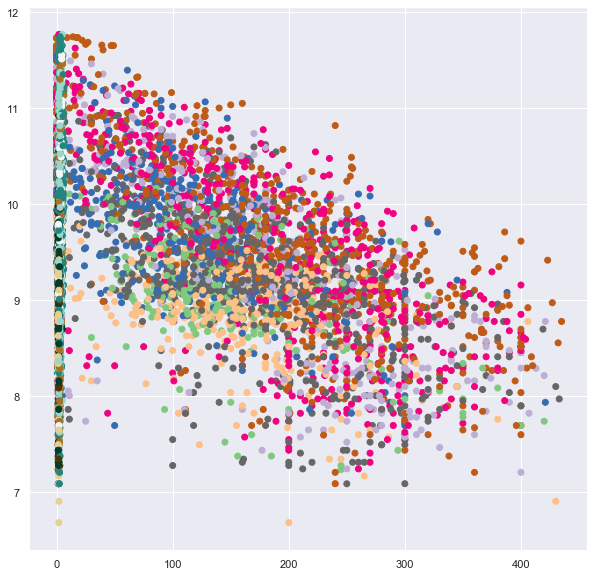

In [23]:
plt.rcParams["figure.figsize"] = (10, 10)

# Create a scatter plot of production and crops
plt.scatter(data_copy['Mileage'],data_copy['log_price'], c=data_copy['Brand'],cmap='Accent')
plt.scatter(data_copy['EngineV'],data_copy['log_price'], c=data_copy['Brand'],cmap='BrBG')

# We start by creating a linear regression object
reg = LinearRegression()

# The whole learning process boils down to fitting the regression
reg.fit(xt,yt)

# Getting the coefficients of the regression
print(reg.coef_)
# Note that the output is an array

# Getting the intercept of the regression
print(reg.intercept_)
# Note that the result is a float as we usually expect a single value

# Get the R-squared of the regression
print('Regression score of this model is:', reg.score(xt,yt)*100)

In [24]:
x

,const,EngineV,Mileage,Brand
0,1.0,2.0,277,4
1,1.0,2.9,427,5
2,1.0,5.0,358,5
3,1.0,4.2,240,1
4,1.0,2.0,120,3
...,...,...,...,...
4338,1.0,2.5,163,6
4339,1.0,1.6,35,3
4340,1.0,3.0,9,5
4341,1.0,3.5,1,4


In [25]:
#creating new data frame, identical in organization x

new_data = pd.DataFrame({'const':1,'EngineV':[2.0,3.4,4.5,1.2,2.4],'Mileage':[278,163,52,256,154],
                         'Brand':[4,6,7,2,3]})
new_data = new_data[['const','EngineV','Mileage','Brand']]
print('The input dataset to be predicted:\n',new_data)

The input dataset to be predicted:
    const  EngineV  Mileage  Brand
0      1      2.0      278      4
1      1      3.4      163      6
2      1      4.5       52      7
3      1      1.2      256      2
4      1      2.4      154      3


In [26]:
#result predictions
predictions = results.predict(new_data)
prod_final = abs(predictions)
final_price = np.exp(prod_final)
print('The predicted values of the price based on above dataset are:\n',final_price)

The predicted values of the price based on above dataset are:
 0     5366.777225
1    19452.840033
2    58598.421321
3     4078.388564
4    12121.600394
dtype: float64


### FINAL REGRESSION IN THE DATA SET

In [37]:
# creating dummy variables 
dataset_with_dummies = pd.get_dummies(dataset_7, drop_first=True)
dataset_with_dummies

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,11500.0,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4339,17900.0,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4340,125000.0,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4341,6500.0,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [43]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
dataset_with_dummies.columns.values

# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']

# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = dataset_with_dummies[cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4339,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4340,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4341,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [49]:
# settig up targets and features for linear regression
target = data_preprocessed['log_price']
features = data_preprocessed.drop(['log_price'],axis=1)

# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(features)

# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(features)
inputs_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.41493781,
        -0.16209221,  1.33267512],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.41493781,
        -0.16209221, -0.75037043],
       [ 2.06500263,  2.68588629, -0.43865069, ...,  2.40999971,
        -0.16209221, -0.75037043],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.41493781,
        -0.16209221, -0.75037043],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.41493781,
        -0.16209221,  1.33267512],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.41493781,
        -0.16209221, -0.75037043]])

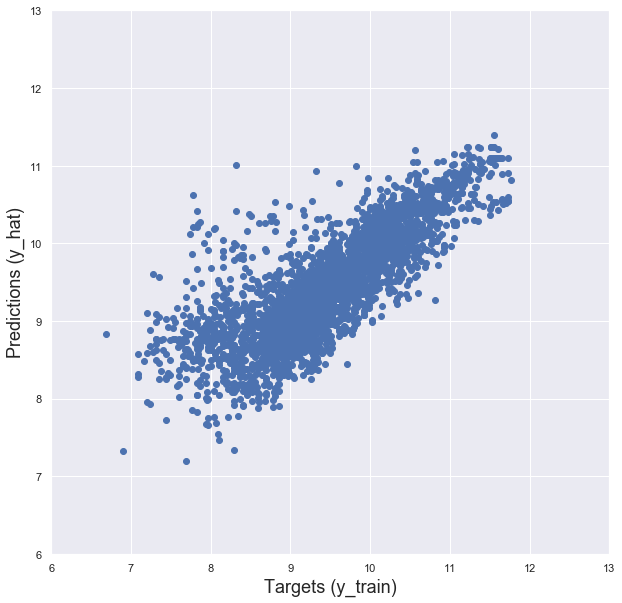

Text(0.5, 1.0, 'Residuals PDF')

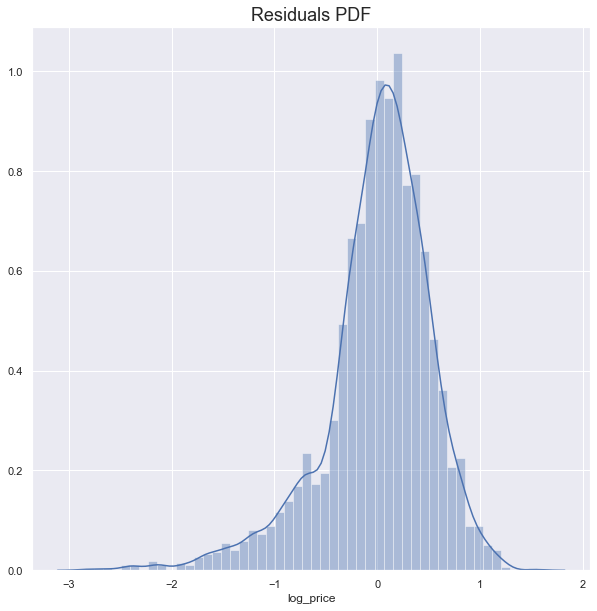

In [53]:
# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [55]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.6327932829432332

### Regression results 

In [57]:
# Obtain the bias (intercept) of the regression
print(reg.intercept_)

# Obtain the weights (coefficients) of the regression
print(reg.coef_)

# Note that they are barely interpretable if at all

# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(features.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
print(reg_summary)

9.416736021792213
[-0.51533512  0.21967031  0.02193221  0.05613578 -0.11389539 -0.13005783
 -0.02169288 -0.04189507 -0.16947147 -0.10072502 -0.22330322 -0.17441764
 -0.13944436 -0.07458352 -0.03385346 -0.09429784]
               Features   Weights
0               Mileage -0.515335
1               EngineV  0.219670
2             Brand_BMW  0.021932
3   Brand_Mercedes-Benz  0.056136
4      Brand_Mitsubishi -0.113895
5         Brand_Renault -0.130058
6          Brand_Toyota -0.021693
7      Brand_Volkswagen -0.041895
8            Body_hatch -0.169471
9            Body_other -0.100725
10           Body_sedan -0.223303
11           Body_vagon -0.174418
12             Body_van -0.139444
13      Engine Type_Gas -0.074584
14    Engine Type_Other -0.033853
15   Engine Type_Petrol -0.094298


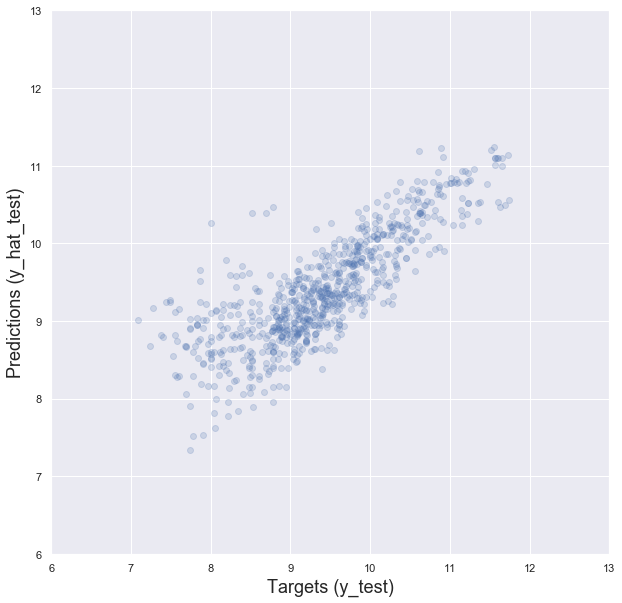

In [58]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [60]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf

# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8290.962337,2300.0
1,10030.951704,2800.0
2,7728.513416,2500.0
3,7106.617356,6400.0
4,8946.423009,9150.0
...,...,...
769,26268.588614,29500.0
770,10780.764943,9600.0
771,13713.032196,18300.0
772,33687.384652,68500.0


In [61]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,8290.962337,2300.0,-5990.962337,260.476623
1,10030.951704,2800.0,-7230.951704,258.248275
2,7728.513416,2500.0,-5228.513416,209.140537
3,7106.617356,6400.0,-706.617356,11.040896
4,8946.423009,9150.0,203.576991,2.224885
...,...,...,...,...
769,26268.588614,29500.0,3231.411386,10.953937
770,10780.764943,9600.0,-1180.764943,12.299635
771,13713.032196,18300.0,4586.967804,25.065398
772,33687.384652,68500.0,34812.615348,50.821336
